## **Advanced Machine Learning Application**
### **AT3**
### **Neural Network**
### **Michael Yaputra**
### **24619001**

**1. Preparing dataset**

**2. Baseline model**

**3. Scaling numerical and categorical columns with sklearn**

**4. Tensorflow using data scaled with sklearn**

**5. Scaling numerical and categorical columns with Tensorflow**

**6. Tensorflow using data scaled with Tensorflow**

### **1. Preparing dataset**

**1.1 Importing libraries**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, DenseFeatures
from sklearn.model_selection import train_test_split

In [113]:
from performance import print_regression_performance_scores
from performance import compute_regression_model_performance
from performance import BaseLinePerformance_regressor
from data_prep import extract_target

**1.2 Loading pre-processed dataset**

In [114]:
# Loading pre-processed dataset
df = pd.read_pickle('optimized_df_final.pkl')
df

,searchDate,flightDate,startingAirport,destinationAirport,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,avgFare,flightDuration,cabinCode,flightDepartureHour,flightDepartureMinute
17,2022-04-23,2022-06-17,ATL,BOS,False,False,False,302.200012,947.0,302.200012,13980,c,12,22
26,2022-04-23,2022-06-17,ATL,BOS,False,False,False,392.100006,956.0,392.100006,12480,c,13,0
138,2022-04-23,2022-06-17,ATL,DTW,True,False,False,291.200012,1278.0,291.200012,15240,c,20,0
237,2022-04-23,2022-06-17,ATL,LAX,True,False,False,348.200012,2245.0,348.200012,21300,c,22,50
319,2022-04-23,2022-06-17,ATL,LGA,True,False,False,262.200012,1118.0,262.200012,12420,c,23,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519994,2022-05-13,2022-05-27,SFO,PHL,False,False,False,962.200012,2663.0,855.697998,23400,c,7,53
13519995,2022-05-13,2022-05-27,SFO,PHL,False,False,False,1007.859985,2978.0,734.979309,26460,c,23,35
13519996,2022-05-13,2022-05-27,SFO,PHL,False,False,False,1013.460022,2978.0,748.539978,26280,c,21,30
13519997,2022-05-13,2022-05-27,SFO,PHL,False,False,False,1133.099976,954.0,1133.099976,21900,p,6,34


**1.3 Showing data types**

In [115]:
# Information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721518 entries, 17 to 13519998
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   searchDate             datetime64[ns]
 1   flightDate             datetime64[ns]
 2   startingAirport        category      
 3   destinationAirport     category      
 4   isBasicEconomy         bool          
 5   isRefundable           bool          
 6   isNonStop              bool          
 7   totalFare              float32       
 8   totalTravelDistance    float32       
 9   avgFare                float32       
 10  flightDuration         uint16        
 11  cabinCode              category      
 12  flightDepartureHour    uint8         
 13  flightDepartureMinute  uint8         
dtypes: bool(3), category(3), datetime64[ns](2), float32(3), uint16(1), uint8(2)
memory usage: 75.5 MB


**1.4 Showing statistical summary**

In [116]:
# Statistical summary
df.describe()

,totalFare,totalTravelDistance,avgFare,flightDuration,flightDepartureHour,flightDepartureMinute
count,1.721518e+06,1.721518e+06,1.721518e+06,1.721518e+06,1.721518e+06,1.721518e+06
mean,4.339800e+02,1.771605e+03,4.342422e+02,1.862113e+04,1.168175e+01,2.549481e+01
std,2.535652e+02,8.081974e+02,2.498273e+02,6.643062e+03,5.093567e+00,1.894282e+01
min,2.397000e+01,9.700000e+01,2.397000e+01,2.760000e+03,0.000000e+00,0.000000e+00
25%,2.672100e+02,1.104000e+03,2.688803e+02,1.356000e+04,7.000000e+00,7.000000e+00
50%,3.966000e+02,1.770345e+03,3.966900e+02,1.830000e+04,1.100000e+01,2.600000e+01
75%,5.453400e+02,2.501000e+03,5.426010e+02,2.382000e+04,1.500000e+01,4.100000e+01
max,8.260610e+03,4.430000e+03,8.260610e+03,5.910000e+04,2.300000e+01,5.900000e+01


**1.5 Checking for missing values**

In [117]:
# Total missing values in each column
df.isna().sum()

searchDate               0
flightDate               0
startingAirport          0
destinationAirport       0
isBasicEconomy           0
isRefundable             0
isNonStop                0
totalFare                0
totalTravelDistance      0
avgFare                  0
flightDuration           0
cabinCode                0
flightDepartureHour      0
flightDepartureMinute    0
dtype: int64

**1.6 Extracting month, day and dayofweek from flightDate**

In [118]:
#Extracting month, day and dayofweek from flightDate
df['flightDepartureMonth'] = df['flightDate'].dt.month
df['flightDepartureDay'] = df['flightDate'].dt.day
df['flightDepartureDayofweek'] = df['flightDate'].dt.dayofweek

**1.7 Dropping unused column**

In [119]:
# Dropping unused columns
df = df.drop(columns=['searchDate', 'totalFare', 'flightDate', 'totalTravelDistance', 'flightDuration'])

Since we pre-processed the data in the previous stage by taking the average of flight fares based on 'searchDate' and 'totalFare' to calculate 'avgFare', we will now drop both columns

We are also dropping 'flightDate' since we already extracted day, month and dayofweek

**1.8 Pairing each departure and arrival airports**

In [120]:
# Pairing unique departure and arrival airports combination
df['departure_and_arrival_pair'] = df.groupby(['startingAirport', 'destinationAirport']).ngroup()

The purpose of the pairing is to ensure when we split the dataset into training and testing, every pair of departure and arrival airports will be present in both training and testing dataset

**1.9 Converting numerical columns to integer**

In [121]:
# Converting numerical columns to integer
df = df.astype({'isBasicEconomy':'int16','isRefundable':'int16', 'isNonStop':'int16', 'flightDepartureHour':'int16', 'flightDepartureMinute':'int16', 'flightDepartureMonth':'int16', 'flightDepartureDay':'int16', 'flightDepartureDayofweek':'int16'})

**1.10 Converting categorical columns to object**

In [122]:
# Converting categorical columns to object
df = df.astype({'startingAirport':'object','destinationAirport':'object', 'cabinCode':'object'})

### **2. Baseline model**

In [123]:
# Instantiating BaseLinePerformance_regressor
baseline = BaseLinePerformance_regressor()

# Extracting y from df_cleaned
y = df["avgFare"]

# Calculating average value of y
y_base = baseline.fit_transform(y=y)

# Calculating RMSE score
print_regression_performance_scores(y, y_base, set_name='Baseline')

Baseline:
RMSE: 249.9594
MAE: 171.7817


### **3. Scaling numerical and categorical data with sklearn**

**3.1 Creating a copy of the dataframe**

In [120]:
# Creating a copy of the dataframe
df_cleaned = df.copy()

**3.2 Importing LabelEncoder and MinMaxScaler from sklearn**

In [121]:
# Importing LabelEncoder and MinMaxScaler from sklearn
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

**3.3 Encoding categorical columns**

In [122]:
# Encoding startingAirport column
startingAirport_label = LabelEncoder()
df_cleaned['startingAirport'] = startingAirport_label.fit_transform(df_cleaned[['startingAirport']])

# Encoding destinationAirport column
destinationAirport_label = LabelEncoder()
df_cleaned['destinationAirport'] = destinationAirport_label.fit_transform(df_cleaned[['destinationAirport']])

# Encoding isBasicEconomy column
isBasicEconomy_label = LabelEncoder()
df_cleaned['isBasicEconomy'] = isBasicEconomy_label.fit_transform(df_cleaned[['isBasicEconomy']])

# Encoding isRefundable column
isRefundable_label = LabelEncoder()
df_cleaned['isRefundable'] = isRefundable_label.fit_transform(df_cleaned[['isRefundable']])

# Encoding isNonStop column
isNonStop_label = LabelEncoder()
df_cleaned['isNonStop'] = isNonStop_label.fit_transform(df_cleaned[['isNonStop']])

# Encoding cabinCode column
cabinCode_label = LabelEncoder()
df_cleaned['cabinCode'] = cabinCode_label.fit_transform(df_cleaned[['cabinCode']])

/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

**3.4 Popping target variable**

In [123]:
# Extracting target variable
y = df_cleaned.pop('avgFare')

# Extracting departure and arrival airport pair
Z = df_cleaned.pop('departure_and_arrival_pair')

# Assigning features to a variable
X = df_cleaned

**3.5 Splitting dataset into training and validation based on departure and arrival pair**

In [124]:
# Splitting dataset into training and validation based on departure and arrival pair
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=3, stratify=Z)

**3.6 Splitting dataset into testing and validation**

In [125]:
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=3)

The reason we are using validation dataset to further split into testing and validation is to make sure training dataset has all departure and arrival pair intact

**3.7 Showing distribution of y_train, y_val and y_test**

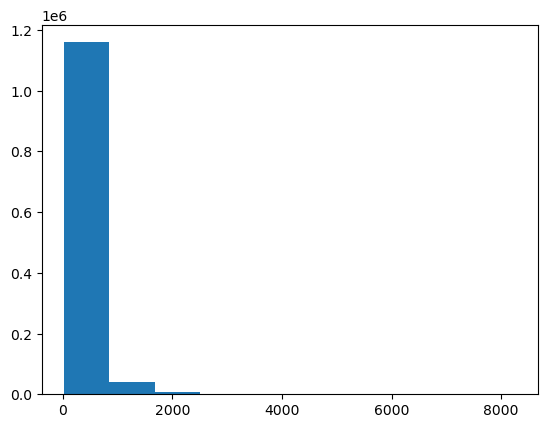

In [132]:
# Distribution of y_train
plt.hist(y_train)
plt.show()

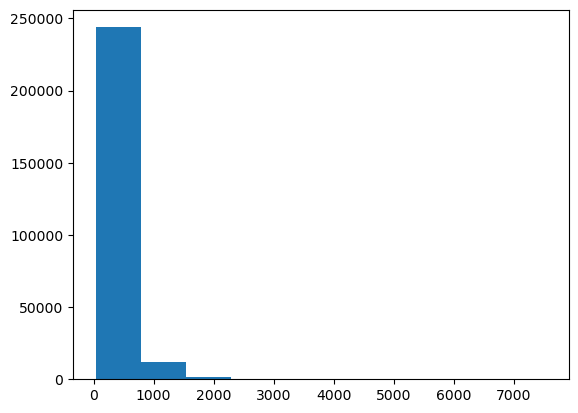

In [133]:
# Distribution of y_val
plt.hist(y_val)
plt.show()

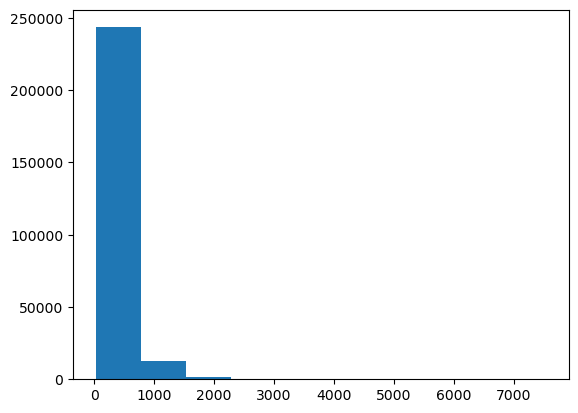

In [134]:
# Distribution of y_test
plt.hist(y_test)
plt.show()

**3.8 Scaling features using MinMaxScaler**

Looks like the data is evenly distributed across training, validation and testing datasets

In [135]:
# Instantiating MinMaxScaler
scaler = MinMaxScaler()

# Fitting X_train to MinMaxScaler
scaler.fit(X_train)

# Transforming X_train, X_val and X_test
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

### **4. Tensorflow using data scaled with sklearn**

#### **4.1 Experiment 1 (32 neurons and 5 epochs)**

**4.1.1 Instantiating tensorflow sequential**

In [28]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model = tf.keras.Sequential()

**4.1.2 Defining architecture**

In [31]:
# Defining hidden layer
layer1 = Dense(32, activation='relu', input_shape=(X_train.shape[-1],))

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model.add(layer1)
model.add(top_layer)

**4.1.3 Configuring learning behaviour**

In [34]:
# Defining loss, optimizer and metrics
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Showing model summary
model.summary()

**4.1.4 Training the model**

In [36]:
# Training the model and saving the history
history = model.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)

2023-11-01 04:56:18.487402: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-01 04:56:18.501208: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


Epoch 1/5
30127/30127 [==============================] - 83s 3ms/step - loss: 50428.8320 - root_mean_squared_error: 224.5636 - val_loss: 44118.7422 - val_root_mean_squared_error: 210.0446
Epoch 2/5
30127/30127 [==============================] - 91s 3ms/step - loss: 42909.4297 - root_mean_squared_error: 207.1459 - val_loss: 43295.4609 - val_root_mean_squared_error: 208.0756
Epoch 3/5
30127/30127 [==============================] - 103s 3ms/step - loss: 42325.0859 - root_mean_squared_error: 205.7306 - val_loss: 42923.3867 - val_root_mean_squared_error: 207.1796
Epoch 4/5
30127/30127 [==============================] - 101s 3ms/step - loss: 42022.4805 - root_mean_squared_error: 204.9939 - val_loss: 42706.0430 - val_root_mean_squared_error: 206.6544
Epoch 5/5
30127/30127 [==============================] - 98s 3ms/step - loss: 41843.4727 - root_mean_squared_error: 204.5568 - val_loss: 42566.4688 - val_root_mean_squared_error: 206.3164


**4.1.5 Evaluating the model**

In [37]:
# Evaluating model
model.evaluate(X_test_scaled, y_test)

8070/8070 [==============================] - 14s 2ms/step - loss: 42911.9297 - root_mean_squared_error: 207.1519


[42911.9296875, 207.15194702148438]

**4.1.6 Plotting learning process**

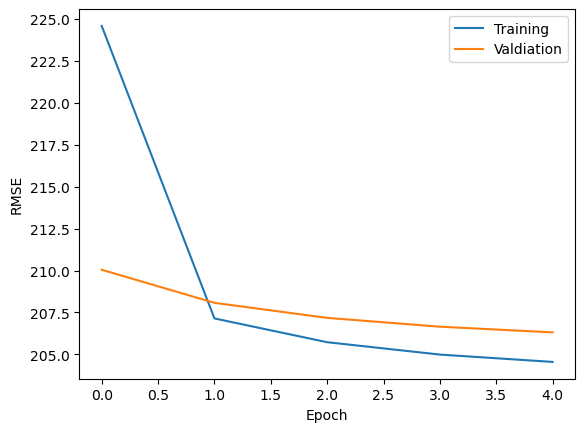

In [49]:
# Defining plots
plt.plot(history.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Valdiation"], loc=0, frameon=legend_drawn_flag)

# Showing plot
plt.show()

#### **4.2 Experiment 2 (64 neurons and 5 epochs)**

**4.2.1 Instantiating tensorflow sequential**

In [138]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_2 = tf.keras.Sequential()

**4.2.2 Defining architecture**

In [139]:
# Defining hidden layer
layer1 = Dense(32, activation='relu', input_shape=(X_train.shape[-1],))

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_2.add(layer1)
model_2.add(top_layer)

**4.2.3 Configuring learning behaviour**

In [140]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.001)
model_2.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Showing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


**4.2.4 Training the model**

In [141]:
# Training the model and saving the history
history_2 = model_2.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
30127/30127 [==============================] - 89s 3ms/step - loss: 50428.8320 - root_mean_squared_error: 224.5636 - val_loss: 44118.7422 - val_root_mean_squared_error: 210.0446
Epoch 2/5
30127/30127 [==============================] - 80s 3ms/step - loss: 42909.4297 - root_mean_squared_error: 207.1459 - val_loss: 43295.4609 - val_root_mean_squared_error: 208.0756
Epoch 3/5
30127/30127 [==============================] - 79s 3ms/step - loss: 42325.0859 - root_mean_squared_error: 205.7306 - val_loss: 42923.3867 - val_root_mean_squared_error: 207.1796
Epoch 4/5
30127/30127 [==============================] - 79s 3ms/step - loss: 42022.4805 - root_mean_squared_error: 204.9939 - val_loss: 42706.0430 - val_root_mean_squared_error: 206.6544
Epoch 5/5
30127/30127 [==============================] - 79s 3ms/step - loss: 41843.4727 - root_mean_squared_error: 204.5568 - val_loss: 42566.4688 - val_root_mean_squared_error: 206.3164


**4.2.5 Evaluating the model**

In [142]:
# Evaluating model
model_2.evaluate(X_test_scaled, y_test)

8070/8070 [==============================] - 14s 2ms/step - loss: 42911.9297 - root_mean_squared_error: 207.1519


[42911.9296875, 207.15194702148438]

**4.2.6 Plotting learning process**

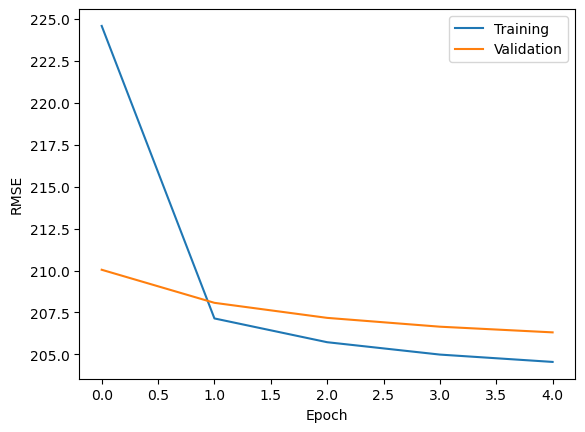

In [143]:
# Defining plots
plt.plot(history_2.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_2.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

# Showing plot
plt.show()

In [144]:
model_2.predict(X_test_scaled[0].reshape((1, 13)))

array([[441.77698]], dtype=float32)

#### **4.3 Experiment 3 (128 neurons, 5 epochs and regularizer)**

**4.3.1 Instantiating tensorflow sequential**

In [145]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_3 = tf.keras.Sequential()

**4.3.2 Defining architecture**

In [146]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
layer1 = Dense(128, activation='relu', input_shape=(X_train.shape[-1],), kernel_regularizer=regularizer)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_3.add(layer1)
model_3.add(top_layer)

**4.3.3 Configuring learning behaviour**

In [147]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.001)
model_3.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Showing model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


**4.3.4 Training the model**

In [148]:
# Training the model and saving the history
history_3 = model_3.fit(X_train_scaled, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
30127/30127 [==============================] - 130s 4ms/step - loss: 46902.3125 - root_mean_squared_error: 216.5053 - val_loss: 43518.2578 - val_root_mean_squared_error: 208.5269
Epoch 2/5
30127/30127 [==============================] - 128s 4ms/step - loss: 42508.9883 - root_mean_squared_error: 206.0840 - val_loss: 43100.1484 - val_root_mean_squared_error: 207.5071
Epoch 3/5
30127/30127 [==============================] - 127s 4ms/step - loss: 42232.3047 - root_mean_squared_error: 205.4008 - val_loss: 42903.9375 - val_root_mean_squared_error: 207.0279
Epoch 4/5
30127/30127 [==============================] - 128s 4ms/step - loss: 42054.6328 - root_mean_squared_error: 204.9628 - val_loss: 42732.4648 - val_root_mean_squared_error: 206.6079
Epoch 5/5
30127/30127 [==============================] - 122s 4ms/step - loss: 41902.6133 - root_mean_squared_error: 204.5883 - val_loss: 42597.0273 - val_root_mean_squared_error: 206.2746


**4.3.5 Evaluating the model**

In [149]:
# Evaluating model
model_3.evaluate(X_test_scaled, y_test)

8070/8070 [==============================] - 17s 2ms/step - loss: 42953.8555 - root_mean_squared_error: 207.1374


[42953.85546875, 207.1374053955078]

**4.3.6 Plotting learning process**

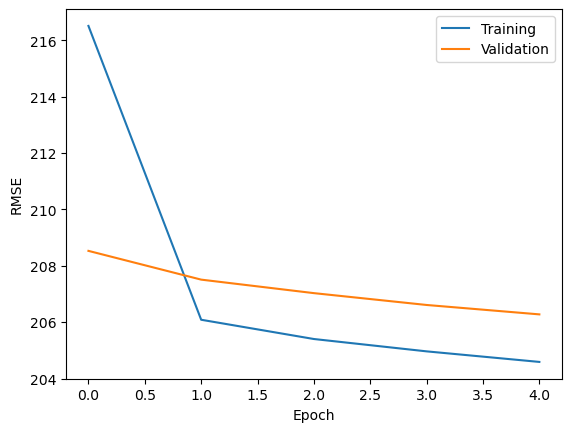

In [150]:
# Defining plots
plt.plot(history_3.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_3.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

#### **4.4 Experiment 4 (128 neurons, 50 epochs, regularizer, dropout and early stopping)**

**4.4.1 Instantiating tensorflow sequential**

In [152]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_4 = tf.keras.Sequential()

**4.4.2 Defining architecture**

In [153]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
layer1 = Dense(128, activation='relu', input_shape=(X_train.shape[-1],), kernel_regularizer=regularizer)

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_4.add(layer1)
model_4.add(dropout)
model_4.add(top_layer)

**4.4.3 Configuring learning behaviour**

In [154]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.001)
model_4.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

# Showing model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


**4.4.4 Training the model**

In [156]:
# Training the model and saving the history
history_4 = model_4.fit(X_train_scaled, y_train, epochs=50, callbacks=[early_stopping], validation_data=(X_val_scaled, y_val))

Epoch 1/50
37659/37659 [==============================] - 164s 4ms/step - loss: 46818.3008 - root_mean_squared_error: 216.3118 - val_loss: 43334.2227 - val_root_mean_squared_error: 208.0859
Epoch 2/50
37659/37659 [==============================] - 160s 4ms/step - loss: 43023.8438 - root_mean_squared_error: 207.3295 - val_loss: 42747.3125 - val_root_mean_squared_error: 206.6523
Epoch 3/50
37659/37659 [==============================] - 160s 4ms/step - loss: 42634.4609 - root_mean_squared_error: 206.3733 - val_loss: 42567.6211 - val_root_mean_squared_error: 206.2066
Epoch 4/50
37659/37659 [==============================] - 160s 4ms/step - loss: 42424.6016 - root_mean_squared_error: 205.8557 - val_loss: 42408.6016 - val_root_mean_squared_error: 205.8153
Epoch 5/50
37659/37659 [==============================] - 159s 4ms/step - loss: 42303.3281 - root_mean_squared_error: 205.5548 - val_loss: 42451.3672 - val_root_mean_squared_error: 205.9116
Epoch 6/50
37659/37659 [==========================

**4.4.5 Evaluating the model**

In [157]:
# Evaluating model
model_4.evaluate(X_test_scaled, y_test)

8070/8070 [==============================] - 18s 2ms/step - loss: 35571.9453 - root_mean_squared_error: 188.4109


[35571.9453125, 188.41087341308594]

**4.4.6 Plotting learning process**

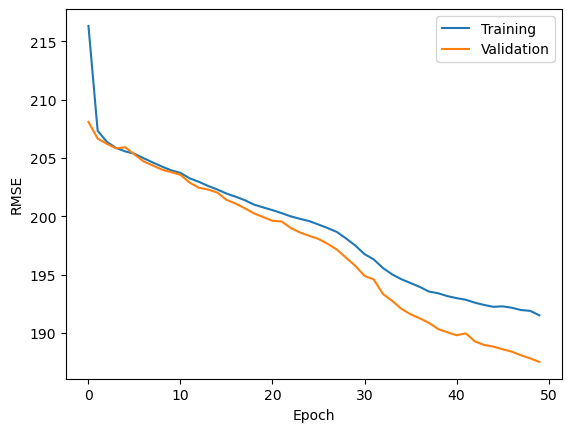

In [158]:
# Defining plots
plt.plot(history_4.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_4.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

# Showing plot
plt.show()

#### **4.5 Experiment 5 (3 layers, 128 neurons, 50 epochs, regularizer, dropout and early stopping)**

**4.5.1 Instantiating tensorflow sequential**

In [ ]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_5 = tf.keras.Sequential()

**4.5.2 Defining architecture**

In [ ]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
layer1 = Dense(128, activation='relu', input_shape=(X_train.shape[-1],), kernel_regularizer=regularizer)
layer2 = Dense(128, activation='relu')
layer3 = Dense(128, activation='relu')

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_5.add(layer1)
model_5.add(layer2)
model_5.add(layer3)
model_5.add(dropout)
model_5.add(top_layer)

**4.5.3 Configuring learning behaviour**

In [ ]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.01)
model_5.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

**4.5.4 Training the model**

In [ ]:
# Training the model and saving the history
history_5 = model_5.fit(X_train_scaled, y_train, epochs=50, callbacks=[early_stopping], validation_data=(X_val_scaled, y_val))

**4.5.5 Evaluating the model**

In [ ]:
# Evaluating model
model_5.evaluate(X_test_scaled, y_test)

**4.5.6 Plotting learning process**

In [ ]:
# Defining plots
plt.plot(history_5.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_5.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

# Showing plot
plt.show()

### **5. Scaling numerical and categorical columns with Tensorflow**

**5.1 Creating a copy of the dataframe**

In [92]:
# Creating a copy of the pipeline
df_cleaned_pipeline = df.copy()

**5.2 Extracting features and target from the dataset**

In [94]:
# Extracting features and target
features, target = extract_target(df_cleaned_pipeline, target_variable='avgFare')

# Dropping departure_and_arrival_pair column
features.drop(columns=['departure_and_arrival_pair'], inplace=True)

**5.3 Splitting datasets into training, validation and testing sets**

In [96]:
# Extracting target and departure_and_arrival_pair
y = df_cleaned_pipeline.pop('avgFare')
Z = df_cleaned_pipeline.pop('departure_and_arrival_pair')
X = df_cleaned_pipeline

# Splitting datasets and stratify by departure_and_arrival_pair to ensure all pairs are equally distributed
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=3, stratify=Z)
X_test, X_val, y_test, y_val = train_test_split(X_val, y_val, test_size=0.5, random_state=3)

**5.4 Converting datasets to tensorflow dataframe**

In [98]:
# Defining a function to convert dataset into tensorflow dataframe
def df_to_dataset(features, target, shuffle=True, batch_size=32):
  ds = tf.data.Dataset.from_tensor_slices((features.to_dict(orient='list'), target))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(features))
  ds = ds.batch(batch_size)
  return ds

In [99]:
# Converting datasets to tensorflow dataframe
train_ds = df_to_dataset(X_train, y_train)
val_ds = df_to_dataset(X_val, y_val, shuffle=False)
test_ds = df_to_dataset(X_test, y_test, shuffle=False)

**5.5 Preparing numerical and categorical columns to be transformed using tensorflow pipeline**

In [100]:
# Importing feature_column from tensorflow
from tensorflow import feature_column

# Creating an empty list
feature_columns = []

In [101]:
# Appending numeric columns to the empty list
for col_name in ['isBasicEconomy', 'isRefundable', 'isNonStop', 'flightDepartureHour', 'flightDepartureMinute', 'flightDepartureMonth', 'flightDepartureDay', 'flightDepartureDayofweek']:
  feature_columns.append(feature_column.numeric_column(col_name))

In [102]:
# Appending categorical features to the empty list for embedding
for col_name in ['startingAirport', 'destinationAirport', 'cabinCode']:
  categorical_column = feature_column.categorical_column_with_vocabulary_list(col_name, features[col_name].unique())
  embedded_column = feature_column.embedding_column(categorical_column, dimension=10)
  feature_columns.append(embedded_column)

### **6. Tensorflow using data scaled with Tensorflow**

#### **6.1 Experiment 6 (1 layer, 32 neurons and 5 epochs)**

**6.1.1 Instantiating tensorflow sequential**

In [ ]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_6 = tf.keras.Sequential()

**6.1.2 Defining architecture**

In [ ]:
# Defining hidden layer
layer1 = Dense(32, activation='relu')

# Defining output layer
feature_layer = DenseFeatures(feature_columns)
top_layer = Dense(1)

# Stacking layers
model_6.add(feature_layer)
model_6.add(layer1)
model_6.add(top_layer)

**6.1.3 Configuring learning behaviour**

In [ ]:
# Defining loss, optimizer and metrics
model_6.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

**6.1.4 Training the model**

In [ ]:
# Training the model and saving the history
history_6 = model_6.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


2023-11-05 09:43:06.050973: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-05 09:43:06.075390: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency
2023-11-05 09:43:16.763857: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 572266 of 1205062
2023-11-05 09:43:26.762314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1138939 of 1205062
2023-11-05 09:43:27.994398: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37654/37659 [============================>.] - ETA: 0s - loss: 39701.6055 - root_mean_squared_error: 199.2526WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int32>, 'flightDepartureMonth': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int32>, 'flightDepartureDay': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) 

2023-11-05 09:47:40.096249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 541205 of 1205062
2023-11-05 09:47:48.562326: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 873127 of 1205062


   24/37659 [..............................] - ETA: 4:17 - loss: 34239.2266 - root_mean_squared_error: 185.0385   

2023-11-05 09:47:55.899559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 268s 6ms/step - loss: 33156.5391 - root_mean_squared_error: 182.0894 - val_loss: 32355.5703 - val_root_mean_squared_error: 179.8765
Epoch 3/5


2023-11-05 09:52:10.955379: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 465871 of 1205062
2023-11-05 09:52:16.730200: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 710851 of 1205062
2023-11-05 09:52:26.730430: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1100861 of 1205062


   25/37659 [..............................] - ETA: 4:10 - loss: 41074.7109 - root_mean_squared_error: 202.6690   

2023-11-05 09:52:29.250449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 306s 7ms/step - loss: 32049.8633 - root_mean_squared_error: 179.0247 - val_loss: 32026.4023 - val_root_mean_squared_error: 178.9592
Epoch 4/5


2023-11-05 09:57:17.708514: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 468706 of 1205062
2023-11-05 09:57:22.487185: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 666295 of 1205062
2023-11-05 09:57:32.712239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1116913 of 1205062


   23/37659 [..............................] - ETA: 4:29 - loss: 35188.4219 - root_mean_squared_error: 187.5858   

2023-11-05 09:57:36.726445: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 317s 8ms/step - loss: 31783.6406 - root_mean_squared_error: 178.2797 - val_loss: 31860.3496 - val_root_mean_squared_error: 178.4947
Epoch 5/5


2023-11-05 10:02:29.964993: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 630968 of 1205062
2023-11-05 10:02:39.964739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1135639 of 1205062


   28/37659 [..............................] - ETA: 3:38 - loss: 38145.1797 - root_mean_squared_error: 195.3079   

2023-11-05 10:02:41.511429: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 245s 6ms/step - loss: 31573.1113 - root_mean_squared_error: 177.6882 - val_loss: 31592.8750 - val_root_mean_squared_error: 177.7439


**6.1.5 Evaluating the model**

In [ ]:
# Evaluating the model
model_6.evaluate(test_ds)

8070/8070 [==============================] - 31s 4ms/step - loss: 32154.0430 - root_mean_squared_error: 179.3155


[32154.04296875, 179.31549072265625]

**6.1.6 Plotting learning process**

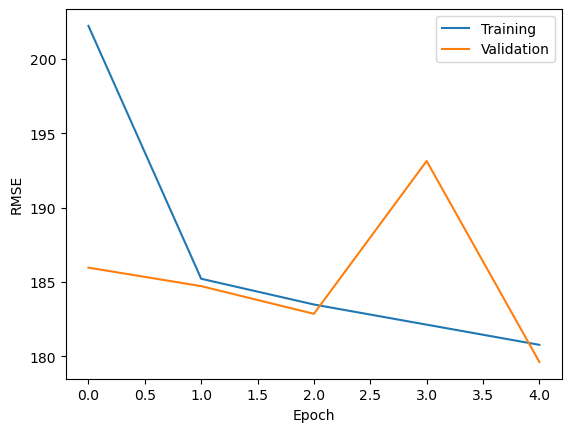

In [60]:
# Defining plots
plt.plot(history_6.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_6.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

#### **6.2 Experiment 7 (1 layer, 64 neurons and 5 epochs)**

**6.2.1 Instantiating tensorflow sequential**

In [61]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_7 = tf.keras.Sequential()

**6.2.2 Defining architecture**

In [62]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
feature_layer = DenseFeatures(feature_columns)
layer1 = Dense(64, activation='relu', kernel_regularizer=regularizer)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_7.add(feature_layer)
model_7.add(layer1)
model_7.add(top_layer)

**6.2.3 Configuring learning behaviour**

In [63]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.01)

model_7.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

**6.2.4 Training the model**

In [64]:
# Training the model and saving the history
history_7 = model_7.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


2023-11-02 07:02:52.414350: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 538564 of 1205062
2023-11-02 07:03:02.414682: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 932496 of 1205062


   24/37659 [..............................] - ETA: 4:26 - loss: 726023.2500 - root_mean_squared_error: 852.0682   

2023-11-02 07:03:08.441369: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37654/37659 [============================>.] - ETA: 0s - loss: 37645.8711 - root_mean_squared_error: 193.4175WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'totalTravelDistance': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int32>, 'flightDuration': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dty

2023-11-02 07:07:42.562166: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 449351 of 1205062
2023-11-02 07:07:52.561642: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 733985 of 1205062
2023-11-02 07:08:03.575996: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1103396 of 1205062


   23/37659 [..............................] - ETA: 4:31 - loss: 35426.4375 - root_mean_squared_error: 187.4748   

2023-11-02 07:08:07.876824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 304s 7ms/step - loss: 35927.9844 - root_mean_squared_error: 188.7995 - val_loss: 36196.3398 - val_root_mean_squared_error: 189.5347
Epoch 3/5


2023-11-02 07:12:50.550620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 284811 of 1205062
2023-11-02 07:12:56.808364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 524393 of 1205062
2023-11-02 07:13:06.808408: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1055605 of 1205062


   25/37659 [..............................] - ETA: 4:11 - loss: 30480.2793 - root_mean_squared_error: 173.8024   

2023-11-02 07:13:14.502640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 316s 7ms/step - loss: 35588.8125 - root_mean_squared_error: 187.9182 - val_loss: 34643.6055 - val_root_mean_squared_error: 185.3618
Epoch 4/5


2023-11-02 07:18:03.037824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 507860 of 1205062
2023-11-02 07:18:13.038012: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1018540 of 1205062


   22/37659 [..............................] - ETA: 4:33 - loss: 38512.0352 - root_mean_squared_error: 195.5183   

2023-11-02 07:18:19.167847: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 282s 7ms/step - loss: 35757.3633 - root_mean_squared_error: 188.3417 - val_loss: 34177.8047 - val_root_mean_squared_error: 184.0850
Epoch 5/5


2023-11-02 07:22:47.996004: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 313544 of 1205062
2023-11-02 07:22:55.705586: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 652825 of 1205062
2023-11-02 07:23:07.198045: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1138083 of 1205062


   25/37659 [..............................] - ETA: 4:16 - loss: 37486.6133 - root_mean_squared_error: 192.8632   

2023-11-02 07:23:10.519093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 302s 7ms/step - loss: 35498.2617 - root_mean_squared_error: 187.6328 - val_loss: 34276.3477 - val_root_mean_squared_error: 184.3498


**6.2.5 Evaluating the model**

In [65]:
# Evaluating the model
model_7.evaluate(test_ds)

8070/8070 [==============================] - 38s 5ms/step - loss: 34763.8789 - root_mean_squared_error: 185.6672


[34763.87890625, 185.66720581054688]

**6.2.6 Plotting learning process**

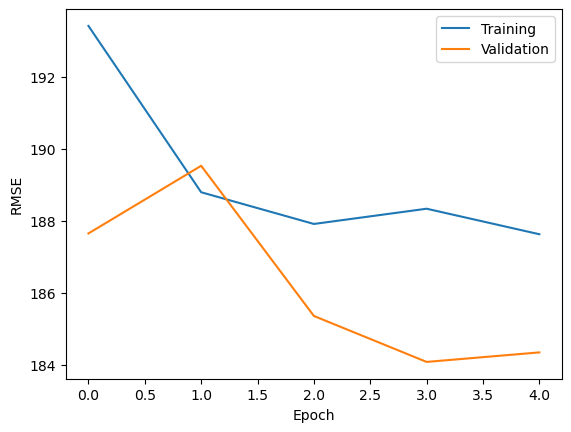

In [66]:
# Defining plots
plt.plot(history_7.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_7.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

# Showing plot
plt.show()

#### **6.3 Experiment 8 (128 neurons, 25 epochs, regularizer, dropout and early stopping)**

**6.3.1 Instantiating tensorflow sequential**

In [67]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_8 = tf.keras.Sequential()

**6.3.2 Defining architecture**

In [68]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
feature_layer = DenseFeatures(feature_columns)
layer1 = Dense(128, activation='relu', kernel_regularizer=regularizer)

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_8.add(feature_layer)
model_8.add(layer1)
model_8.add(dropout)
model_8.add(top_layer)

**6.3.3 Configuring learning behaviour**

In [69]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.01)
model_8.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

**6.3.4 Training the model**

In [70]:
# Training the model and saving the history
history_8 = model_8.fit(train_ds, epochs=25, callbacks=[early_stopping], validation_data=val_ds)

Epoch 1/25
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


2023-11-02 07:28:30.255691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 479754 of 1205062
2023-11-02 07:28:40.255368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 917237 of 1205062


   19/37659 [..............................] - ETA: 5:46 - loss: 1144297.2500 - root_mean_squared_error: 1069.7161 

2023-11-02 07:28:46.785671: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37657/37659 [============================>.] - ETA: 0s - loss: 42482.8438 - root_mean_squared_error: 205.1910WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'totalTravelDistance': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int32>, 'flightDuration': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dty

2023-11-02 07:34:37.996798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 407170 of 1205062
2023-11-02 07:34:45.466693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 656291 of 1205062
2023-11-02 07:34:55.466383: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 972710 of 1205062


    8/37659 [..............................] - ETA: 11:06 - loss: 39955.5469 - root_mean_squared_error: 199.0045  

2023-11-02 07:35:01.895372: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 424s 10ms/step - loss: 40130.5352 - root_mean_squared_error: 199.4879 - val_loss: 36804.2344 - val_root_mean_squared_error: 190.9862
Epoch 3/25


2023-11-02 07:41:40.013589: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 524472 of 1205062
2023-11-02 07:41:49.998492: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 960102 of 1205062


   19/37659 [..............................] - ETA: 5:41 - loss: 46145.6133 - root_mean_squared_error: 214.0496   

2023-11-02 07:41:56.646601: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 373s 9ms/step - loss: 39781.7578 - root_mean_squared_error: 198.6755 - val_loss: 36356.5391 - val_root_mean_squared_error: 189.9065
Epoch 4/25


2023-11-02 07:47:52.903859: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 521477 of 1205062
2023-11-02 07:48:03.899030: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 962260 of 1205062


   18/37659 [..............................] - ETA: 5:48 - loss: 37704.4531 - root_mean_squared_error: 193.4227   

2023-11-02 07:48:11.533208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 376s 9ms/step - loss: 39538.8906 - root_mean_squared_error: 198.1331 - val_loss: 37598.8320 - val_root_mean_squared_error: 193.1827
Epoch 5/25


2023-11-02 07:54:09.161732: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 530019 of 1205062
2023-11-02 07:54:20.005422: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1032430 of 1205062


   19/37659 [..............................] - ETA: 5:51 - loss: 37226.0742 - root_mean_squared_error: 192.2158   

2023-11-02 07:54:25.118913: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 367s 9ms/step - loss: 38833.2109 - root_mean_squared_error: 196.4127 - val_loss: 36936.2031 - val_root_mean_squared_error: 191.5316
Epoch 6/25


2023-11-02 08:00:16.236612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 523788 of 1205062
2023-11-02 08:00:27.206297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1038761 of 1205062


   14/37659 [..............................] - ETA: 7:30 - loss: 34592.3711 - root_mean_squared_error: 185.3120  

2023-11-02 08:00:31.959374: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 361s 9ms/step - loss: 38133.7344 - root_mean_squared_error: 194.6256 - val_loss: 34710.9922 - val_root_mean_squared_error: 185.5828
Epoch 7/25


2023-11-02 08:06:19.759770: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 333575 of 1205062
2023-11-02 08:06:27.578451: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 636490 of 1205062
2023-11-02 08:06:37.578655: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1092773 of 1205062


   17/37659 [..............................] - ETA: 6:23 - loss: 33958.7266 - root_mean_squared_error: 183.5448   

2023-11-02 08:06:45.003775: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 393s 9ms/step - loss: 38383.4727 - root_mean_squared_error: 195.2008 - val_loss: 35187.9414 - val_root_mean_squared_error: 186.8184
Epoch 8/25


2023-11-02 08:12:59.337110: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 557234 of 1205062
2023-11-02 08:13:10.823245: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1076768 of 1205062


   15/37659 [..............................] - ETA: 6:55 - loss: 26471.2598 - root_mean_squared_error: 161.8159  

2023-11-02 08:13:15.062347: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 373s 9ms/step - loss: 37685.0547 - root_mean_squared_error: 193.3454 - val_loss: 36041.0898 - val_root_mean_squared_error: 189.0174
Epoch 9/25


2023-11-02 08:19:03.768399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 357266 of 1205062
2023-11-02 08:19:13.768236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 573958 of 1205062
2023-11-02 08:19:23.768208: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1001928 of 1205062


   16/37659 [..............................] - ETA: 6:25 - loss: 45284.9844 - root_mean_squared_error: 212.0649    

2023-11-02 08:19:32.513269: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 390s 9ms/step - loss: 37722.8984 - root_mean_squared_error: 193.3931 - val_loss: 35402.9258 - val_root_mean_squared_error: 187.2907
Epoch 10/25


2023-11-02 08:25:33.810597: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 410871 of 1205062
2023-11-02 08:25:43.810502: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 525818 of 1205062
2023-11-02 08:25:53.810285: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 970062 of 1205062


   19/37659 [..............................] - ETA: 5:43 - loss: 43204.8398 - root_mean_squared_error: 207.0737   

2023-11-02 08:25:58.588951: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 398s 10ms/step - loss: 38044.2344 - root_mean_squared_error: 194.2527 - val_loss: 34076.8750 - val_root_mean_squared_error: 183.7746
Epoch 11/25


2023-11-02 08:32:12.331896: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 528141 of 1205062
2023-11-02 08:32:22.328728: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1054380 of 1205062


   15/37659 [..............................] - ETA: 7:06 - loss: 49647.5586 - root_mean_squared_error: 222.1346  

2023-11-02 08:32:27.931625: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 358s 9ms/step - loss: 37586.0273 - root_mean_squared_error: 193.0951 - val_loss: 36818.0977 - val_root_mean_squared_error: 191.1201
Epoch 12/25


2023-11-02 08:38:13.939698: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 344469 of 1205062
2023-11-02 08:38:20.705762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 606349 of 1205062
2023-11-02 08:38:30.705947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1025007 of 1205062


   17/37659 [..............................] - ETA: 6:11 - loss: 42759.1680 - root_mean_squared_error: 206.0778    

2023-11-02 08:38:34.616719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 383s 9ms/step - loss: 37306.3945 - root_mean_squared_error: 192.3597 - val_loss: 34470.5547 - val_root_mean_squared_error: 184.8047
Epoch 13/25


2023-11-02 08:45:32.694674: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 538590 of 1205062
2023-11-02 08:45:42.694976: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1076428 of 1205062


   17/37659 [..............................] - ETA: 6:02 - loss: 25752.7637 - root_mean_squared_error: 159.4835   

2023-11-02 08:45:48.200867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 363s 9ms/step - loss: 36993.9961 - root_mean_squared_error: 191.4794 - val_loss: 34415.0742 - val_root_mean_squared_error: 184.6057
Epoch 14/25


2023-11-02 08:51:36.198601: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 385472 of 1205062
2023-11-02 08:51:46.198380: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 578813 of 1205062
2023-11-02 08:51:56.198400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1020086 of 1205062


   16/37659 [..............................] - ETA: 6:58 - loss: 35450.7266 - root_mean_squared_error: 187.3897   

2023-11-02 08:52:03.938956: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 658s 16ms/step - loss: 36893.3164 - root_mean_squared_error: 191.1947 - val_loss: 33443.7656 - val_root_mean_squared_error: 181.9391
Epoch 15/25


2023-11-02 09:02:34.815299: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 402078 of 1205062
2023-11-02 09:02:44.814882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 529511 of 1205062
2023-11-02 09:02:54.815111: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 976759 of 1205062


   18/37659 [..............................] - ETA: 6:02 - loss: 40468.0508 - root_mean_squared_error: 200.3147   

2023-11-02 09:02:59.620693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 412s 10ms/step - loss: 37388.6562 - root_mean_squared_error: 192.4735 - val_loss: 34248.7578 - val_root_mean_squared_error: 184.1264
Epoch 16/25


2023-11-02 09:09:27.329297: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 537921 of 1205062
2023-11-02 09:09:37.328322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1078842 of 1205062


   19/37659 [..............................] - ETA: 5:51 - loss: 43179.9492 - root_mean_squared_error: 206.9629   

2023-11-02 09:09:42.692100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 359s 9ms/step - loss: 36819.0117 - root_mean_squared_error: 190.9927 - val_loss: 34422.4883 - val_root_mean_squared_error: 184.6223
Epoch 17/25


2023-11-02 09:15:26.922003: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 383327 of 1205062
2023-11-02 09:15:36.921826: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 611183 of 1205062
2023-11-02 09:15:46.921825: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1009216 of 1205062


   15/37659 [..............................] - ETA: 6:54 - loss: 54353.9961 - root_mean_squared_error: 232.4156   

2023-11-02 09:15:55.120368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 435s 11ms/step - loss: 36993.5625 - root_mean_squared_error: 191.4543 - val_loss: 38548.6055 - val_root_mean_squared_error: 195.4833
Epoch 18/25


2023-11-02 09:22:52.937100: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 541325 of 1205062
2023-11-02 09:23:02.936836: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1059947 of 1205062


   17/37659 [..............................] - ETA: 6:35 - loss: 32660.1250 - root_mean_squared_error: 179.7919   

2023-11-02 09:23:09.184505: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 373s 9ms/step - loss: 37119.2578 - root_mean_squared_error: 191.7964 - val_loss: 34451.2148 - val_root_mean_squared_error: 184.7108
Epoch 19/25


2023-11-02 09:28:55.411128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 381444 of 1205062
2023-11-02 09:29:05.411017: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 517934 of 1205062
2023-11-02 09:29:15.410975: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 877485 of 1205062


   10/37659 [..............................] - ETA: 7:44 - loss: 40294.8672 - root_mean_squared_error: 199.9046    

2023-11-02 09:29:24.965621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 403s 10ms/step - loss: 36822.7617 - root_mean_squared_error: 191.0334 - val_loss: 36111.1992 - val_root_mean_squared_error: 189.1599
Epoch 20/25


2023-11-02 09:35:39.006146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 287245 of 1205062
2023-11-02 09:35:51.680270: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 316237 of 1205062
2023-11-02 09:35:59.005988: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 472203 of 1205062
2023-11-02 09:36:09.005974: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 765866 of 1205062
2023-11-02 09:36:19.006005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1182759 of 1205062


    8/37659 [..............................] - ETA: 15:13 - loss: 39303.1797 - root_mean_squared_error: 197.4169

2023-11-02 09:36:19.532159: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1171s 30ms/step - loss: 36712.9688 - root_mean_squared_error: 190.7507 - val_loss: 33967.1445 - val_root_mean_squared_error: 183.4212
Epoch 21/25


2023-11-02 09:55:10.203813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 531789 of 1205062
2023-11-02 09:55:20.203938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1052713 of 1205062


   20/37659 [..............................] - ETA: 5:29 - loss: 39856.2539 - root_mean_squared_error: 198.8273   

2023-11-02 09:55:25.304992: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 358s 9ms/step - loss: 37223.8477 - root_mean_squared_error: 192.0922 - val_loss: 34237.4062 - val_root_mean_squared_error: 184.1539
Epoch 22/25


2023-11-02 10:01:08.433142: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 392827 of 1205062
2023-11-02 10:01:18.433041: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 599398 of 1205062
2023-11-02 10:01:28.433048: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1029017 of 1205062


   17/37659 [..............................] - ETA: 6:44 - loss: 37042.4688 - root_mean_squared_error: 191.6188   

2023-11-02 10:01:36.403449: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1992s 52ms/step - loss: 37048.9375 - root_mean_squared_error: 191.6364 - val_loss: 34669.5078 - val_root_mean_squared_error: 185.3241
Epoch 23/25


2023-11-02 10:34:21.165543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 483631 of 1205062
2023-11-02 10:34:31.165395: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 983775 of 1205062
2023-11-02 11:08:54.964813: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1147413 of 1205062
2023-11-02 11:08:55.023774: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1147414 of 1205062
2023-11-02 11:08:55.036743: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1147415 of 1205062
2023-11-02 11:08:55.055386: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1147416 of 1205062
2023-11-02 11:08:55.077360: I tensorflow/core/kernels/data/shuffle

   16/37659 [..............................] - ETA: 6:26 - loss: 29838.2266 - root_mean_squared_error: 171.7954     

2023-11-02 11:08:58.008938: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 41176s 1s/step - loss: 36799.4219 - root_mean_squared_error: 190.9885 - val_loss: 38275.1602 - val_root_mean_squared_error: 194.8156
Epoch 24/25


2023-11-02 22:00:37.181312: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 310065 of 1205062
2023-11-02 22:00:47.175794: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 500633 of 1205062
2023-11-02 22:00:57.175762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 884256 of 1205062


   18/37659 [..............................] - ETA: 5:52 - loss: 30944.9766 - root_mean_squared_error: 174.9940   

2023-11-02 22:01:05.567028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 399s 10ms/step - loss: 36806.9531 - root_mean_squared_error: 190.9997 - val_loss: 33408.1289 - val_root_mean_squared_error: 181.8851
Epoch 25/25


2023-11-02 22:07:16.176936: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 141890 of 1205062
2023-11-02 22:07:41.290390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 308414 of 1205062
2023-11-02 22:07:41.312972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 308415 of 1205062
2023-11-02 22:07:46.167324: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 458878 of 1205062
2023-11-02 22:07:56.167474: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 792462 of 1205062


    9/37659 [..............................] - ETA: 8:42 - loss: 26931.3359 - root_mean_squared_error: 163.1111    

2023-11-02 22:08:05.411720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 508s 12ms/step - loss: 36762.8203 - root_mean_squared_error: 190.8864 - val_loss: 34500.0664 - val_root_mean_squared_error: 184.8660


**6.3.5 Evaluating the model**

In [71]:
# Evaluating model
model_8.evaluate(test_ds)

8070/8070 [==============================] - 45s 6ms/step - loss: 35198.0391 - root_mean_squared_error: 186.7445


[35198.0390625, 186.74447631835938]

**6.3.6 Plotting learning process**

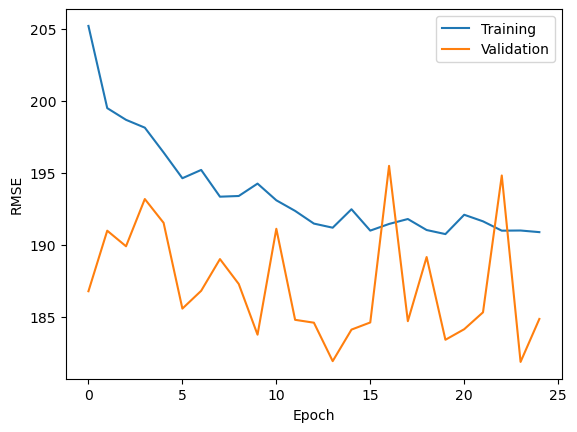

In [72]:
# Defining plots
plt.plot(history_8.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_8.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

#### **6.4 Experiment 9 (2 layers, 128 neurons, 25 epochs, regularizer, dropout and early stopping)**

**6.4.1 Instantiating tensorflow sequential**

In [33]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_9 = tf.keras.Sequential()

**6.4.2 Defining architecture**

In [34]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
feature_layer = DenseFeatures(feature_columns)
layer1 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer2 = Dense(128, activation='relu', kernel_regularizer=regularizer)

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_9.add(feature_layer)
model_9.add(layer1)
model_9.add(layer2)
model_9.add(dropout)
model_9.add(top_layer)

**6.4.3 Configuring learning behaviour**

In [35]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.01)
model_9.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

**6.4.4 Training the model**

In [36]:
# Training the model and saving the history
history_9 = model_9.fit(train_ds, epochs=25, callbacks=[early_stopping], validation_data=val_ds)

Epoch 1/25
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


2023-11-02 23:22:39.098529: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-11-02 23:22:39.123891: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency
2023-11-02 23:22:49.897404: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 356219 of 1205062
2023-11-02 23:22:59.896105: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 772333 of 1205062
2023-11-02 23:23:09.076651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - ETA: 0s - loss: 43075.2383 - root_mean_squared_error: 206.9275WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'totalTravelDistance': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int32>, 'flightDuration': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dty

2023-11-02 23:38:41.923039: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 420690 of 1205062
2023-11-02 23:38:51.922719: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 673333 of 1205062
2023-11-02 23:39:01.922936: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1062235 of 1205062


    6/37659 [..............................] - ETA: 15:15 - loss: 34601.0664 - root_mean_squared_error: 185.3130  

2023-11-02 23:39:05.739853: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 981s 25ms/step - loss: 39989.6328 - root_mean_squared_error: 199.3254 - val_loss: 36676.3984 - val_root_mean_squared_error: 190.9621
Epoch 3/25


2023-11-02 23:55:07.991953: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 356893 of 1205062
2023-11-02 23:55:13.074563: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 552046 of 1205062
2023-11-02 23:55:24.769249: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1056302 of 1205062


    7/37659 [..............................] - ETA: 13:12 - loss: 29434.6406 - root_mean_squared_error: 170.9527  

2023-11-02 23:55:30.458529: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 957s 24ms/step - loss: 39030.9102 - root_mean_squared_error: 197.0463 - val_loss: 34986.4180 - val_root_mean_squared_error: 186.4388
Epoch 4/25


2023-11-03 00:11:06.699195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 371334 of 1205062
2023-11-03 00:11:10.484413: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 471127 of 1205062
2023-11-03 00:11:20.484793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 949142 of 1205062
2023-11-03 00:11:30.484843: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1110117 of 1205062


    6/37659 [..............................] - ETA: 16:08 - loss: 25121.9766 - root_mean_squared_error: 157.7817  

2023-11-03 00:11:33.625291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 958s 24ms/step - loss: 38079.8945 - root_mean_squared_error: 194.5415 - val_loss: 34658.7266 - val_root_mean_squared_error: 185.5068
Epoch 5/25


2023-11-03 00:26:58.929807: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 497523 of 1205062
2023-11-03 00:27:08.929766: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 991344 of 1205062


    6/37659 [..............................] - ETA: 14:46 - loss: 38665.4219 - root_mean_squared_error: 196.0089  

2023-11-03 00:27:15.676116: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1346s 35ms/step - loss: 48258.8750 - root_mean_squared_error: 219.1147 - val_loss: 39350.9922 - val_root_mean_squared_error: 197.7526
Epoch 6/25


2023-11-03 00:49:26.941679: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 312422 of 1205062
2023-11-03 00:49:35.561040: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 724443 of 1205062
2023-11-03 00:49:45.564720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1143152 of 1205062


    6/37659 [..............................] - ETA: 16:10 - loss: 40356.6758 - root_mean_squared_error: 200.2794  

2023-11-03 00:49:48.525160: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 868s 22ms/step - loss: 41072.9688 - root_mean_squared_error: 202.0413 - val_loss: 37379.2852 - val_root_mean_squared_error: 192.6217
Epoch 7/25


2023-11-03 01:03:58.144675: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 392859 of 1205062
2023-11-03 01:04:03.448702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 570570 of 1205062
2023-11-03 01:04:13.448655: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1030617 of 1205062


    7/37659 [..............................] - ETA: 13:31 - loss: 47744.0273 - root_mean_squared_error: 217.8711  

2023-11-03 01:04:20.621113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 903s 23ms/step - loss: 38620.0742 - root_mean_squared_error: 195.7894 - val_loss: 35860.7109 - val_root_mean_squared_error: 188.5907
Epoch 8/25


2023-11-03 01:18:56.273915: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 518086 of 1205062
2023-11-03 01:19:06.274139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1037924 of 1205062


    6/37659 [..............................] - ETA: 15:55 - loss: 39966.8750 - root_mean_squared_error: 199.1800  

2023-11-03 01:19:12.155209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 864s 22ms/step - loss: 37542.2344 - root_mean_squared_error: 193.0020 - val_loss: 38647.5820 - val_root_mean_squared_error: 195.8317
Epoch 9/25


2023-11-03 01:33:23.231640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 315381 of 1205062
2023-11-03 01:33:30.921848: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 632504 of 1205062
2023-11-03 01:33:40.921787: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1068743 of 1205062


    8/37659 [..............................] - ETA: 15:32 - loss: 44824.9375 - root_mean_squared_error: 211.0150

2023-11-03 01:33:48.970834: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 913s 23ms/step - loss: 37198.7148 - root_mean_squared_error: 192.0848 - val_loss: 35761.3906 - val_root_mean_squared_error: 188.3167
Epoch 10/25


2023-11-03 01:48:33.912544: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 413027 of 1205062
2023-11-03 01:48:43.912233: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 566798 of 1205062
2023-11-03 01:48:53.912435: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 965922 of 1205062


    6/37659 [..............................] - ETA: 14:54 - loss: 49268.2500 - root_mean_squared_error: 221.2918  

2023-11-03 01:48:58.939131: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 922s 24ms/step - loss: 36743.8477 - root_mean_squared_error: 190.8667 - val_loss: 35571.9453 - val_root_mean_squared_error: 187.7408
Epoch 11/25


2023-11-03 02:03:56.084713: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 393774 of 1205062
2023-11-03 02:04:08.156239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 765780 of 1205062
2023-11-03 02:04:16.084254: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 993033 of 1205062


    6/37659 [..............................] - ETA: 14:46 - loss: 51319.1602 - root_mean_squared_error: 225.8179   

2023-11-03 02:04:21.689244: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 940s 24ms/step - loss: 36826.5703 - root_mean_squared_error: 191.0343 - val_loss: 34664.2891 - val_root_mean_squared_error: 185.2757
Epoch 12/25


2023-11-03 02:19:36.414095: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 387918 of 1205062
2023-11-03 02:19:46.606800: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 494185 of 1205062
2023-11-03 02:19:56.413605: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 877717 of 1205062


    5/37659 [..............................] - ETA: 22:20 - loss: 29419.9473 - root_mean_squared_error: 170.5363  

2023-11-03 02:20:04.912985: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 2002s 52ms/step - loss: 37492.8203 - root_mean_squared_error: 192.7435 - val_loss: 35795.1367 - val_root_mean_squared_error: 188.2848
Epoch 13/25


2023-11-03 02:52:58.491362: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 203657 of 1205062
2023-11-03 02:53:15.692097: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 315020 of 1205062
2023-11-03 02:53:18.490737: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 347465 of 1205062
2023-11-03 02:53:28.491057: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 612918 of 1205062
2023-11-03 02:53:38.491058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 940089 of 1205062


    5/37659 [..............................] - ETA: 18:48 - loss: 31649.0664 - root_mean_squared_error: 176.9327  

2023-11-03 02:53:45.511734: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1270s 32ms/step - loss: 37733.5508 - root_mean_squared_error: 193.3628 - val_loss: 35689.0781 - val_root_mean_squared_error: 188.0197
Epoch 14/25


2023-11-03 03:14:08.614309: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 325597 of 1205062
2023-11-03 03:14:18.614282: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 715929 of 1205062
2023-11-03 03:14:28.643096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 956190 of 1205062
2023-11-03 03:14:38.621351: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1174752 of 1205062


    5/37659 [..............................] - ETA: 17:24 - loss: 305883.5625 - root_mean_squared_error: 552.7621 

2023-11-03 03:14:40.023989: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1196s 31ms/step - loss: 37988.4023 - root_mean_squared_error: 194.0795 - val_loss: 35029.2188 - val_root_mean_squared_error: 186.3130
Restoring model weights from the end of the best epoch.
Epoch 00014: early stopping


**6.4.5 Evaluating the model**

In [37]:
# Evaluating model
model_9.evaluate(test_ds)

8070/8070 [==============================] - 98s 12ms/step - loss: 35051.6016 - root_mean_squared_error: 186.5626


[35051.6015625, 186.5626220703125]

**6.4.6 Plotting learning process**

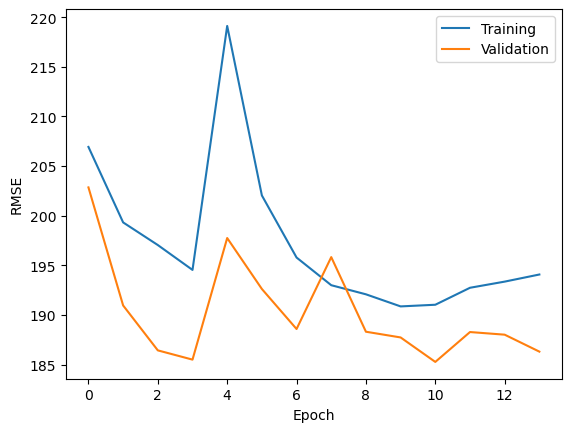

In [38]:
# Defining plots
plt.plot(history_9.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_9.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

#### **6.5 Experiment 10 (3 layers, 128 neurons, 25 epochs, regularizer, dropout and early stopping)**

**6.5.1 Instantiating tensorflow sequential**

In [39]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_10 = tf.keras.Sequential()

**6.5.2 Defining architecture**

In [40]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
feature_layer = DenseFeatures(feature_columns)
layer1 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer2 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer3 = Dense(128, activation='relu', kernel_regularizer=regularizer)

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_10.add(feature_layer)
model_10.add(layer1)
model_10.add(layer2)
model_10.add(layer3)
model_10.add(dropout)
model_10.add(top_layer)

**6.5.3 Configuring learning behaviour**

In [41]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.01)
model_10.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

**6.5.4 Training the model**

In [42]:
# Training the model and saving the history
history_10 = model_10.fit(train_ds, epochs=25, callbacks=[early_stopping], validation_data=val_ds)

Epoch 1/25
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


2023-11-03 03:36:04.254136: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 444386 of 1205062
2023-11-03 03:36:14.253127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 886132 of 1205062
2023-11-03 03:36:24.253534: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1180218 of 1205062


    3/37659 [..............................] - ETA: 25:26 - loss: 16969264.0000 - root_mean_squared_error: 4119.3730 

2023-11-03 03:36:24.927901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - ETA: 0s - loss: 44212.2422 - root_mean_squared_error: 209.3425WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'totalTravelDistance': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int32>, 'flightDuration': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dty

2023-11-03 04:03:27.883240: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 380569 of 1205062
2023-11-03 04:03:34.933409: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 688650 of 1205062
2023-11-03 04:03:44.933465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1159104 of 1205062


    4/37659 [..............................] - ETA: 25:18 - loss: 55410.9688 - root_mean_squared_error: 234.6960  

2023-11-03 04:03:45.871778: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1612s 42ms/step - loss: 51320.0078 - root_mean_squared_error: 225.7646 - val_loss: 35827.2812 - val_root_mean_squared_error: 188.1709
Epoch 3/25


2023-11-03 04:30:17.535167: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 311160 of 1205062
2023-11-03 04:30:27.534901: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 327427 of 1205062
2023-11-03 04:30:37.535549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 683607 of 1205062
2023-11-03 04:30:47.534720: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1066218 of 1205062


    4/37659 [..............................] - ETA: 28:41 - loss: 38382.7109 - root_mean_squared_error: 194.8424  

2023-11-03 04:30:51.707586: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1906s 49ms/step - loss: 45598.7500 - root_mean_squared_error: 212.6062 - val_loss: 35688.4219 - val_root_mean_squared_error: 187.8489
Epoch 4/25


2023-11-03 05:02:04.183779: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 183163 of 1205062
2023-11-03 05:02:22.289152: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 295447 of 1205062
2023-11-03 05:02:24.182888: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 338904 of 1205062
2023-11-03 05:02:34.184621: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 694021 of 1205062
2023-11-03 05:02:44.183304: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 877985 of 1205062


    4/37659 [..............................] - ETA: 26:52 - loss: 40657.2773 - root_mean_squared_error: 200.6391   

2023-11-03 05:02:54.111638: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1730s 44ms/step - loss: 39295.4844 - root_mean_squared_error: 197.3015 - val_loss: 36209.1367 - val_root_mean_squared_error: 189.3031
Epoch 5/25


2023-11-03 05:30:54.683020: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 98843 of 1205062
2023-11-03 05:31:16.012991: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 287362 of 1205062
2023-11-03 05:31:16.017767: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 287363 of 1205062
2023-11-03 05:31:24.682364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 415609 of 1205062
2023-11-03 05:31:34.681146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 608008 of 1205062
2023-11-03 05:31:44.681102: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 934135 of 1205062


    2/37659 [..............................] - ETA: 33:23 - loss: 28494.4902 - root_mean_squared_error: 167.6934    

2023-11-03 05:31:53.779015: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1799s 46ms/step - loss: 58313.9102 - root_mean_squared_error: 240.6753 - val_loss: 35400.6250 - val_root_mean_squared_error: 187.1198
Epoch 6/25


2023-11-03 06:00:54.021091: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 167596 of 1205062
2023-11-03 06:01:08.994224: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 283765 of 1205062
2023-11-03 06:01:14.020815: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 379921 of 1205062
2023-11-03 06:01:24.020970: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 564129 of 1205062
2023-11-03 06:01:34.020917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 886085 of 1205062
2023-11-03 06:01:44.024092: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1198535 of 1205062
2023-11-03 06:01:44.248366: I tensorflow/core/kernels/data/shuffle_da

37659/37659 [==============================] - 1844s 47ms/step - loss: 80873.1641 - root_mean_squared_error: 283.6984 - val_loss: 38572.7773 - val_root_mean_squared_error: 195.4246
Epoch 7/25


2023-11-03 06:31:46.206415: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 282316 of 1205062
2023-11-03 06:31:48.487330: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 314312 of 1205062
2023-11-03 06:31:58.487346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 743950 of 1205062
2023-11-03 06:32:08.487549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1162806 of 1205062


    5/37659 [..............................] - ETA: 22:54 - loss: 34179.8984 - root_mean_squared_error: 183.8420  

2023-11-03 06:32:09.392972: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1716s 44ms/step - loss: 43034.5820 - root_mean_squared_error: 206.5087 - val_loss: 35098.0859 - val_root_mean_squared_error: 186.2834
Epoch 8/25


2023-11-03 07:00:23.039126: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 281871 of 1205062
2023-11-03 07:00:24.944592: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 324506 of 1205062
2023-11-03 07:00:34.944688: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 762356 of 1205062


    1/37659 [..............................] - ETA: 419:57:02 - loss: 83537.5234 - root_mean_squared_error: 288.3419

2023-11-03 07:00:44.944741: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1201512 of 1205062
2023-11-03 07:00:45.032089: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1737s 45ms/step - loss: 40228.2266 - root_mean_squared_error: 199.5951 - val_loss: 42922.3320 - val_root_mean_squared_error: 206.2203
Epoch 9/25


2023-11-03 07:29:20.334434: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 281561 of 1205062
2023-11-03 07:29:22.598852: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 323123 of 1205062
2023-11-03 07:29:32.599223: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 748637 of 1205062


    3/37659 [..............................] - ETA: 28:16 - loss: 18209.7129 - root_mean_squared_error: 133.4690    

2023-11-03 07:29:42.599214: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1203711 of 1205062
2023-11-03 07:29:42.628877: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1531s 40ms/step - loss: 38070.2969 - root_mean_squared_error: 194.1299 - val_loss: 34835.6875 - val_root_mean_squared_error: 185.6723
Epoch 10/25


2023-11-03 07:54:44.111216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 526407 of 1205062
2023-11-03 07:54:54.110997: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1057673 of 1205062


    5/37659 [..............................] - ETA: 21:12 - loss: 34611.0859 - root_mean_squared_error: 185.0663  

2023-11-03 07:54:59.216322: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1585s 41ms/step - loss: 38210.3477 - root_mean_squared_error: 194.5581 - val_loss: 37232.8828 - val_root_mean_squared_error: 192.0430
Epoch 11/25


2023-11-03 08:21:09.013620: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 420570 of 1205062
2023-11-03 08:21:19.013101: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 693722 of 1205062
2023-11-03 08:21:29.013417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1191468 of 1205062


    5/37659 [..............................] - ETA: 22:38 - loss: 40661.5938 - root_mean_squared_error: 200.7715  

2023-11-03 08:21:29.278602: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1401s 36ms/step - loss: 37966.6211 - root_mean_squared_error: 194.0862 - val_loss: 35697.7305 - val_root_mean_squared_error: 188.2409
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping


**6.5.5 Evaluating the model**

In [43]:
# Evaluating model
model_10.evaluate(test_ds)

8070/8070 [==============================] - 170s 21ms/step - loss: 35287.9062 - root_mean_squared_error: 186.9736


[35287.90625, 186.9736328125]

**6.5.6 Plotting learning process**

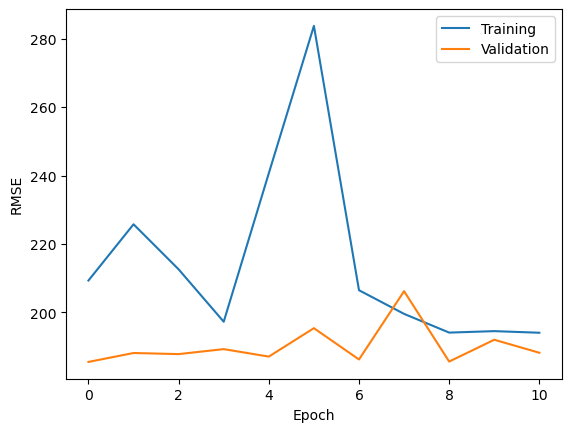

In [44]:
# Defining plots
plt.plot(history_10.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_10.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

#### **6.6 Experiment 11 (3 layers, 128 neurons, 25 epochs, regularizer, dropout, early stopping and learning_rate = 0.001)**

**6.6.1 Instantiating tensorflow sequential**

In [45]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_11 = tf.keras.Sequential()

**6.6.2 Defining architecture**

In [46]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
feature_layer = DenseFeatures(feature_columns)
layer1 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer2 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer3 = Dense(128, activation='relu', kernel_regularizer=regularizer)

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_11.add(feature_layer)
model_11.add(layer1)
model_11.add(layer2)
model_11.add(layer3)
model_11.add(dropout)
model_11.add(top_layer)

**6.6.3 Configuring learning behaviour**

In [47]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.001)
model_11.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=10,
    restore_best_weights=True
)

**6.6.4 Training the model**

In [48]:
# Training the model and saving the history
history_11 = model_11.fit(train_ds, epochs=25, callbacks=[early_stopping], validation_data=val_ds)

Epoch 1/25
Consider rewriting this model with the Functional API.
Consider rewriting this model with the Functional API.


2023-11-03 08:57:08.489648: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 522112 of 1205062
2023-11-03 08:57:18.489093: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 870718 of 1205062


    3/37659 [..............................] - ETA: 32:06 - loss: 402465.7188 - root_mean_squared_error: 634.3762   

2023-11-03 08:57:27.391315: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - ETA: 0s - loss: 38910.9688 - root_mean_squared_error: 196.7889WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_11:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'totalTravelDistance': <tf.Tensor 'ExpandDims_12:0' shape=(None, 1) dtype=int32>, 'flightDuration': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dty

2023-11-03 09:25:08.113632: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 332501 of 1205062
2023-11-03 09:25:21.123217: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 499318 of 1205062
2023-11-03 09:25:28.113470: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 678438 of 1205062
2023-11-03 09:25:38.113542: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 850928 of 1205062
2023-11-03 09:25:57.071005: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1101523 of 1205062
2023-11-03 09:25:58.133865: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1101539 of 1205062


    3/37659 [..............................] - ETA: 25:54 - loss: 16987.1504 - root_mean_squared_error: 129.3750    

2023-11-03 09:26:03.859926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1801s 46ms/step - loss: 34917.0156 - root_mean_squared_error: 186.1534 - val_loss: 33702.4844 - val_root_mean_squared_error: 182.8476
Epoch 3/25


2023-11-03 09:55:14.033012: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 342357 of 1205062
2023-11-03 09:55:19.534640: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 541592 of 1205062
2023-11-03 09:55:29.535027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1028826 of 1205062


    5/37659 [..............................] - ETA: 25:25 - loss: 38526.7930 - root_mean_squared_error: 195.5955  

2023-11-03 09:55:39.182174: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1748s 45ms/step - loss: 34113.4531 - root_mean_squared_error: 183.9590 - val_loss: 35086.2852 - val_root_mean_squared_error: 186.5650
Epoch 4/25


2023-11-03 10:24:24.677799: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 330574 of 1205062
2023-11-03 10:24:28.236684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 438405 of 1205062
2023-11-03 10:24:38.237081: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 839088 of 1205062
2023-11-03 10:24:48.310433: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1119292 of 1205062


    4/37659 [..............................] - ETA: 26:32 - loss: 33548.2227 - root_mean_squared_error: 182.3965  

2023-11-03 10:24:53.525471: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1709s 44ms/step - loss: 33669.8008 - root_mean_squared_error: 182.7275 - val_loss: 33430.0664 - val_root_mean_squared_error: 182.0809
Epoch 5/25


2023-11-03 10:52:54.867762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 319374 of 1205062
2023-11-03 10:52:57.357300: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 366656 of 1205062
2023-11-03 10:53:07.357677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 707131 of 1205062
2023-11-03 10:53:17.357645: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1081088 of 1205062


    4/37659 [..............................] - ETA: 26:20 - loss: 36496.7500 - root_mean_squared_error: 190.3161  

2023-11-03 10:53:26.142628: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1670s 43ms/step - loss: 33264.5625 - root_mean_squared_error: 181.6350 - val_loss: 31938.5449 - val_root_mean_squared_error: 177.9560
Epoch 6/25


2023-11-03 11:20:37.700791: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 408874 of 1205062
2023-11-03 11:20:47.700335: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 527839 of 1205062
2023-11-03 11:20:57.700660: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 976991 of 1205062


    4/37659 [..............................] - ETA: 24:38 - loss: 20945.4297 - root_mean_squared_error: 143.7890  

2023-11-03 11:21:06.546424: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


19159/37659 [==============>...............] - ETA: 5:13:02 - loss: 32703.2012 - root_mean_squared_error: 180.0924

IOStream.flush timed out


37659/37659 [==============================] - 36437s 967ms/step - loss: 32908.8086 - root_mean_squared_error: 180.6653 - val_loss: 32608.1035 - val_root_mean_squared_error: 179.8439
Epoch 7/25


2023-11-03 21:27:54.816695: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 414539 of 1205062
2023-11-03 21:28:04.816320: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 651172 of 1205062
2023-11-03 21:28:14.817400: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 985452 of 1205062


    4/37659 [..............................] - ETA: 27:20 - loss: 31888.5293 - root_mean_squared_error: 177.8320  

2023-11-03 21:28:22.639087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1391s 36ms/step - loss: 32606.4414 - root_mean_squared_error: 179.8444 - val_loss: 32586.1250 - val_root_mean_squared_error: 179.7979
Epoch 8/25


2023-11-03 21:51:06.426882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 406769 of 1205062
2023-11-03 21:51:16.454787: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 481007 of 1205062
2023-11-03 21:51:26.426692: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 899559 of 1205062
2023-11-03 21:51:36.426502: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1197506 of 1205062
2023-11-03 21:51:36.614014: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1407s 36ms/step - loss: 32371.8125 - root_mean_squared_error: 179.2189 - val_loss: 32229.3711 - val_root_mean_squared_error: 178.8390
Epoch 9/25


2023-11-03 22:14:33.614427: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 280062 of 1205062
2023-11-03 22:14:46.539544: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 428803 of 1205062
2023-11-03 22:14:53.613202: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 665491 of 1205062
2023-11-03 22:15:03.613069: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1137402 of 1205062
2023-11-03 22:15:13.613487: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1200776 of 1205062
2023-11-03 22:15:13.783433: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1495s 38ms/step - loss: 32165.3008 - root_mean_squared_error: 178.6586 - val_loss: 32212.0312 - val_root_mean_squared_error: 178.7847
Epoch 10/25


2023-11-03 22:39:28.675690: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 373591 of 1205062
2023-11-03 22:39:39.172986: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 540935 of 1205062
2023-11-03 22:39:48.675205: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 892572 of 1205062


    3/37659 [..............................] - ETA: 35:43 - loss: 16360.6104 - root_mean_squared_error: 126.9356    

2023-11-03 22:39:55.175952: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 2432s 64ms/step - loss: 32021.2891 - root_mean_squared_error: 178.2460 - val_loss: 31199.5469 - val_root_mean_squared_error: 175.9208
Epoch 11/25


2023-11-03 23:20:00.502459: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 313897 of 1205062
2023-11-03 23:20:14.062037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 602975 of 1205062
2023-11-03 23:20:20.501889: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 770918 of 1205062
2023-11-03 23:20:30.502340: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1054479 of 1205062


    4/37659 [..............................] - ETA: 29:28 - loss: 26429.9766 - root_mean_squared_error: 161.7978  

2023-11-03 23:20:34.739401: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1855s 48ms/step - loss: 31910.0469 - root_mean_squared_error: 177.9296 - val_loss: 31312.2266 - val_root_mean_squared_error: 176.2472
Epoch 12/25


2023-11-03 23:50:55.980474: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 308035 of 1205062
2023-11-03 23:51:08.690276: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 493451 of 1205062
2023-11-03 23:51:15.980488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 677774 of 1205062
2023-11-03 23:51:25.980173: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1041696 of 1205062


    5/37659 [..............................] - ETA: 23:49 - loss: 34368.3516 - root_mean_squared_error: 184.7140  

2023-11-03 23:51:35.038313: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1699s 44ms/step - loss: 31820.4102 - root_mean_squared_error: 177.6808 - val_loss: 31176.1875 - val_root_mean_squared_error: 175.8554
Epoch 13/25


2023-11-04 00:19:15.338301: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 332898 of 1205062
2023-11-04 00:19:28.859180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 506738 of 1205062
2023-11-04 00:19:35.337996: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 693556 of 1205062
2023-11-04 00:19:45.338225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1058979 of 1205062


    3/37659 [..............................] - ETA: 26:02 - loss: 17224.1113 - root_mean_squared_error: 130.2800  

2023-11-04 00:19:49.094798: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1507s 39ms/step - loss: 31721.6934 - root_mean_squared_error: 177.4027 - val_loss: 31210.5020 - val_root_mean_squared_error: 175.9606
Epoch 14/25


2023-11-04 00:44:22.719261: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 396563 of 1205062
2023-11-04 00:44:32.751994: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 546479 of 1205062
2023-11-04 00:44:42.718983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 933168 of 1205062


    5/37659 [..............................] - ETA: 20:47 - loss: 18123.2969 - root_mean_squared_error: 133.6972  

2023-11-04 00:44:47.955586: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1403s 36ms/step - loss: 31655.4062 - root_mean_squared_error: 177.2146 - val_loss: 30904.8613 - val_root_mean_squared_error: 175.0797
Epoch 15/25


2023-11-04 01:07:45.822702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 520355 of 1205062
2023-11-04 01:07:55.822401: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1034345 of 1205062


    5/37659 [..............................] - ETA: 22:27 - loss: 26513.4727 - root_mean_squared_error: 162.0540  

2023-11-04 01:08:01.880561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1489s 39ms/step - loss: 31619.2695 - root_mean_squared_error: 177.1000 - val_loss: 33008.7422 - val_root_mean_squared_error: 180.9729
Epoch 16/25


2023-11-04 01:32:35.306363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 357305 of 1205062
2023-11-04 01:32:45.306277: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 573855 of 1205062
2023-11-04 01:32:55.306044: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1010594 of 1205062


    5/37659 [..............................] - ETA: 21:40 - loss: 19998.6094 - root_mean_squared_error: 140.5031

2023-11-04 01:33:03.661292: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1928s 50ms/step - loss: 31539.5312 - root_mean_squared_error: 176.8584 - val_loss: 31032.7109 - val_root_mean_squared_error: 175.4110
Epoch 17/25


2023-11-04 02:04:43.185349: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 179286 of 1205062
2023-11-04 02:05:01.194484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 375062 of 1205062
2023-11-04 02:05:03.229849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 380542 of 1205062
2023-11-04 02:05:13.185155: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 541257 of 1205062
2023-11-04 02:05:23.185274: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 757929 of 1205062
2023-11-04 02:05:33.185132: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1041066 of 1205062


    4/37659 [..............................] - ETA: 28:25 - loss: 28055.7070 - root_mean_squared_error: 166.7092  

2023-11-04 02:05:38.871964: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1679s 43ms/step - loss: 31491.6836 - root_mean_squared_error: 176.7058 - val_loss: 30764.1699 - val_root_mean_squared_error: 174.6270
Epoch 18/25


2023-11-04 02:32:42.537668: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 295684 of 1205062
2023-11-04 02:32:52.536591: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 682499 of 1205062
2023-11-04 02:33:02.575314: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 847269 of 1205062
2023-11-04 02:33:12.537481: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1102277 of 1205062


    3/37659 [..............................] - ETA: 36:05 - loss: 50279.0664 - root_mean_squared_error: 223.6280  

2023-11-04 02:33:20.759793: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1659s 43ms/step - loss: 31399.2305 - root_mean_squared_error: 176.4301 - val_loss: 32617.3555 - val_root_mean_squared_error: 179.8425
Epoch 19/25


2023-11-04 03:00:22.147440: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 116313 of 1205062
2023-11-04 03:00:32.148654: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 329096 of 1205062
2023-11-04 03:00:52.816465: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 457182 of 1205062
2023-11-04 03:00:52.819529: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 457183 of 1205062
2023-11-04 03:01:02.147216: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 614456 of 1205062
2023-11-04 03:01:12.147226: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 771881 of 1205062
2023-11-04 03:01:22.147225: I tensorflow/core/kernels/data/shuffle_dat

    4/37659 [..............................] - ETA: 27:05 - loss: 46474.6641 - root_mean_squared_error: 214.9431  

2023-11-04 03:01:27.274353: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1691s 43ms/step - loss: 31369.5371 - root_mean_squared_error: 176.3315 - val_loss: 30843.0195 - val_root_mean_squared_error: 174.8252
Epoch 20/25


2023-11-04 03:28:33.523017: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 259785 of 1205062
2023-11-04 03:29:02.421684: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 324966 of 1205062
2023-11-04 03:29:02.427616: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 324967 of 1205062
2023-11-04 03:29:03.560855: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 334093 of 1205062
2023-11-04 03:29:13.522894: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 598591 of 1205062
2023-11-04 03:29:23.522925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 927234 of 1205062


    5/37659 [..............................] - ETA: 25:00 - loss: 21066.9570 - root_mean_squared_error: 144.1800  

2023-11-04 03:29:31.408511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1914s 49ms/step - loss: 31301.3574 - root_mean_squared_error: 176.1260 - val_loss: 31411.4844 - val_root_mean_squared_error: 176.4311
Epoch 21/25


2023-11-04 04:00:28.030974: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 148805 of 1205062
2023-11-04 04:00:38.031012: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 266941 of 1205062
2023-11-04 04:01:04.410265: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 283714 of 1205062
2023-11-04 04:01:04.418056: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 283715 of 1205062
2023-11-04 04:01:08.108656: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 288820 of 1205062
2023-11-04 04:01:18.031096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 377351 of 1205062
2023-11-04 04:01:28.031973: I tensorflow/core/kernels/data/shuffle_dat

    2/37659 [..............................] - ETA: 50:53 - loss: 26842.1992 - root_mean_squared_error: 162.9683     

2023-11-04 04:02:12.828238: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 2406s 61ms/step - loss: 31276.3789 - root_mean_squared_error: 176.0418 - val_loss: 30720.3047 - val_root_mean_squared_error: 174.4498
Epoch 22/25


2023-11-04 04:40:34.359410: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 336979 of 1205062
2023-11-04 04:40:44.359380: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 677461 of 1205062
2023-11-04 04:40:54.359294: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1052198 of 1205062
2023-11-04 04:41:04.359319: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1182659 of 1205062


    1/37659 [..............................] - ETA: 434:10:00 - loss: 22575.0625 - root_mean_squared_error: 149.2901

2023-11-04 04:41:05.768722: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1786s 46ms/step - loss: 31205.9570 - root_mean_squared_error: 175.8319 - val_loss: 31761.3965 - val_root_mean_squared_error: 177.4003
Epoch 23/25


2023-11-04 05:10:20.598054: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 452719 of 1205062
2023-11-04 05:10:30.595947: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 905459 of 1205062
2023-11-04 05:10:40.642266: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1181686 of 1205062


    3/37659 [..............................] - ETA: 28:45 - loss: 20560.7598 - root_mean_squared_error: 142.3735    

2023-11-04 05:10:48.250241: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1659s 43ms/step - loss: 31186.5430 - root_mean_squared_error: 175.7651 - val_loss: 30845.9180 - val_root_mean_squared_error: 174.7894
Epoch 24/25


2023-11-04 05:38:00.247762: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 347397 of 1205062
2023-11-04 05:38:10.247948: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 565887 of 1205062
2023-11-04 05:38:20.246331: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 934018 of 1205062


    4/37659 [..............................] - ETA: 28:40 - loss: 18323.0762 - root_mean_squared_error: 134.2699  

2023-11-04 05:38:26.637714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1578s 41ms/step - loss: 31170.5430 - root_mean_squared_error: 175.7107 - val_loss: 30916.9219 - val_root_mean_squared_error: 174.9816
Epoch 25/25


2023-11-04 06:04:18.959333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 339697 of 1205062
2023-11-04 06:04:32.144707: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 682335 of 1205062
2023-11-04 06:04:38.960824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 819639 of 1205062
2023-11-04 06:04:48.959222: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1145178 of 1205062


    4/37659 [..............................] - ETA: 25:08 - loss: 21175.9766 - root_mean_squared_error: 144.4908  

2023-11-04 06:04:51.325388: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 1647s 43ms/step - loss: 31113.6211 - root_mean_squared_error: 175.5385 - val_loss: 30789.7344 - val_root_mean_squared_error: 174.6087


**6.6.5 Evaluating the model**

In [49]:
# Evaluating model
model_11.evaluate(test_ds)

8070/8070 [==============================] - 140s 17ms/step - loss: 31436.7090 - root_mean_squared_error: 176.4516


[31436.708984375, 176.4515838623047]

**6.6.6 Plotting learning process**

In [29]:
# Defining plots
plt.plot(history_11.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_11.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

NameError: name 'history_11' is not defined

#### **6.7 Experiment 12 (10 layers, 128 neurons, 50 epochs, regularizer, dropout, early stopping and learning_rate = 0.001)**

**6.7.1 Instantiating tensorflow sequential**

In [105]:
# Setting random seed
tf.random.set_seed(8)

# Instantiating tensorflow
model_12 = tf.keras.Sequential()

**6.7.2 Defining architecture**

In [106]:
# Defining regularizer
regularizer = tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)

# Defining hidden layer
feature_layer = DenseFeatures(feature_columns)
layer1 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer2 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer3 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer4 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer5 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer6 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer7 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer8 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer9 = Dense(128, activation='relu', kernel_regularizer=regularizer)
layer10 = Dense(128, activation='relu', kernel_regularizer=regularizer)

#Defining dropout
dropout = Dropout(0.1)

# Defining output layer
top_layer = Dense(1)

# Stacking layers
model_12.add(feature_layer)
model_12.add(layer1)
model_12.add(layer2)
model_12.add(layer3)
model_12.add(layer4)
model_12.add(layer5)
model_12.add(layer6)
model_12.add(layer7)
model_12.add(layer8)
model_12.add(layer9)
model_12.add(layer10)
model_12.add(dropout)
model_12.add(top_layer)

**6.7.3 Configuring learning behaviour**

In [107]:
# Defining loss, optimizer and metrics
optimizer = tf.keras.optimizers.Adam(0.001)
model_12.compile(loss='mse', optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Defining early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    verbose=1,
    patience=3,
    restore_best_weights=True
)

**6.7.4 Training the model**

In [108]:
# Training the model and saving the history
history_12 = model_12.fit(train_ds, epochs=50, callbacks=[early_stopping], validation_data=val_ds)

Epoch 1/50
Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.
2023-11-05 10:35:16.923827: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 655103 of 1205062
2023-11-05 10:35:26.923423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1177502 of 1205062


    1/37659 [..............................] - ETA: 271:50:03 - loss: 171231.5000 - root_mean_squared_error: 413.6447

2023-11-05 10:35:27.420417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - ETA: 0s - loss: 32936.1094 - root_mean_squared_error: 181.3679WARNING:tensorflow:Layers in a Sequential model should only have a single input tensor, but we receive a <class 'dict'> input: {'startingAirport': <tf.Tensor 'ExpandDims_10:0' shape=(None, 1) dtype=string>, 'destinationAirport': <tf.Tensor 'ExpandDims_1:0' shape=(None, 1) dtype=string>, 'isBasicEconomy': <tf.Tensor 'ExpandDims_7:0' shape=(None, 1) dtype=int32>, 'isRefundable': <tf.Tensor 'ExpandDims_9:0' shape=(None, 1) dtype=int32>, 'isNonStop': <tf.Tensor 'ExpandDims_8:0' shape=(None, 1) dtype=int32>, 'cabinCode': <tf.Tensor 'ExpandDims:0' shape=(None, 1) dtype=string>, 'flightDepartureHour': <tf.Tensor 'ExpandDims_4:0' shape=(None, 1) dtype=int32>, 'flightDepartureMinute': <tf.Tensor 'ExpandDims_5:0' shape=(None, 1) dtype=int32>, 'flightDepartureMonth': <tf.Tensor 'ExpandDims_6:0' shape=(None, 1) dtype=int32>, 'flightDepartureDay': <tf.Tensor 'ExpandDims_2:0' shape=(None, 1) 

Consider rewriting this model with the Functional API.


37659/37659 [==============================] - 26562s 705ms/step - loss: 32936.1094 - root_mean_squared_error: 181.3679 - val_loss: 29092.5605 - val_root_mean_squared_error: 170.4678
Epoch 2/50


2023-11-05 17:57:55.332874: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 333014 of 1205062
2023-11-05 17:58:04.004027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 800280 of 1205062


    1/37659 [..............................] - ETA: 314:54:18 - loss: 77375.0703 - root_mean_squared_error: 278.1038

2023-11-05 17:58:13.978128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 4908s 130ms/step - loss: 28996.3145 - root_mean_squared_error: 170.1734 - val_loss: 27758.1504 - val_root_mean_squared_error: 166.4794
Epoch 3/50


2023-11-05 19:19:46.259371: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 355742 of 1205062
2023-11-05 19:19:51.978239: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 525765 of 1205062
2023-11-05 19:20:01.977875: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1096992 of 1205062


    1/37659 [..............................] - ETA: 380:03:21 - loss: 36237.8047 - root_mean_squared_error: 190.2499

2023-11-05 19:20:08.173125: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


17574/37659 [============>.................] - ETA: 15:10:09 - loss: 28408.2227 - root_mean_squared_error: 168.4117

IOStream.flush timed out


37659/37659 [==============================] - 50525s 1s/step - loss: 27839.0312 - root_mean_squared_error: 166.7041 - val_loss: 27667.1172 - val_root_mean_squared_error: 166.1709
Epoch 4/50


2023-11-06 09:21:47.734581: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 623296 of 1205062
2023-11-06 09:21:57.732839: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1138996 of 1205062


    1/37659 [..............................] - ETA: 228:06:49 - loss: 13286.4482 - root_mean_squared_error: 115.0314

2023-11-06 09:21:59.411461: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 5468s 145ms/step - loss: 27146.0059 - root_mean_squared_error: 164.5785 - val_loss: 26374.1758 - val_root_mean_squared_error: 162.2005
Epoch 5/50


2023-11-06 10:52:57.270607: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 341627 of 1205062
2023-11-06 10:53:05.796740: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 721216 of 1205062
2023-11-06 10:53:15.807468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1153007 of 1205062


    1/37659 [..............................] - ETA: 343:11:06 - loss: 9769.5967 - root_mean_squared_error: 98.5111

2023-11-06 10:53:18.468018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 38051s 1s/step - loss: 26677.5508 - root_mean_squared_error: 163.1154 - val_loss: 26410.8848 - val_root_mean_squared_error: 162.2790
Epoch 6/50


2023-11-06 21:27:21.845495: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 264338 of 1205062
2023-11-06 21:27:34.687329: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 539208 of 1205062
2023-11-06 21:27:41.845368: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 827654 of 1205062
2023-11-06 21:27:51.845262: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1192960 of 1205062


    1/37659 [..............................] - ETA: 423:13:57 - loss: 8615.6074 - root_mean_squared_error: 92.4075

2023-11-06 21:27:52.154442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 7518s 199ms/step - loss: 26317.9395 - root_mean_squared_error: 161.9745 - val_loss: 25719.7773 - val_root_mean_squared_error: 160.1015
Epoch 7/50


2023-11-06 23:32:39.947671: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 224763 of 1205062
2023-11-06 23:32:52.357631: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 480331 of 1205062
2023-11-06 23:32:59.947399: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 654350 of 1205062
2023-11-06 23:33:09.947445: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 917269 of 1205062
2023-11-06 23:33:22.322551: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1192363 of 1205062


    1/37659 [..............................] - ETA: 581:52:53 - loss: 19026.1270 - root_mean_squared_error: 137.6182

2023-11-06 23:33:25.419211: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 6028s 159ms/step - loss: 26003.6758 - root_mean_squared_error: 160.9676 - val_loss: 25582.0156 - val_root_mean_squared_error: 159.6348
Epoch 8/50


2023-11-07 01:13:08.544442: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 374185 of 1205062
2023-11-07 01:13:18.544097: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 497007 of 1205062
2023-11-07 01:13:28.544443: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 715768 of 1205062
2023-11-07 01:13:38.544364: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1062883 of 1205062
2023-11-07 01:13:48.544351: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1203618 of 1205062
2023-11-07 01:13:48.643087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 7037s 186ms/step - loss: 25716.9922 - root_mean_squared_error: 160.0412 - val_loss: 25543.7305 - val_root_mean_squared_error: 159.4825
Epoch 9/50


2023-11-07 03:10:30.720925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 624080 of 1205062
2023-11-07 03:10:40.721624: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1083797 of 1205062


    1/37659 [..............................] - ETA: 246:49:08 - loss: 20211.8398 - root_mean_squared_error: 141.7844

2023-11-07 03:10:44.174144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 6548s 173ms/step - loss: 25453.0820 - root_mean_squared_error: 159.1820 - val_loss: 25486.3730 - val_root_mean_squared_error: 159.2723
Epoch 10/50


2023-11-07 04:59:38.790796: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 212913 of 1205062
2023-11-07 04:59:54.501759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 300844 of 1205062
2023-11-07 04:59:58.790775: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 390395 of 1205062
2023-11-07 05:00:08.790610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 752034 of 1205062
2023-11-07 05:00:18.790571: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1105643 of 1205062


    1/37659 [..............................] - ETA: 590:27:14 - loss: 12779.5293 - root_mean_squared_error: 112.5203

2023-11-07 05:00:25.102209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 6384s 168ms/step - loss: 25264.2617 - root_mean_squared_error: 158.5585 - val_loss: 25091.3984 - val_root_mean_squared_error: 157.9982
Epoch 11/50


2023-11-07 06:46:03.391087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 475218 of 1205062
2023-11-07 06:46:13.390599: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 989134 of 1205062


    1/37659 [..............................] - ETA: 299:47:38 - loss: 11481.0020 - root_mean_squared_error: 106.5507

2023-11-07 06:46:21.871463: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 5671s 150ms/step - loss: 25099.4902 - root_mean_squared_error: 158.0078 - val_loss: 24728.1641 - val_root_mean_squared_error: 156.8145
Epoch 12/50


2023-11-07 08:20:38.670771: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 324308 of 1205062
2023-11-07 08:20:44.576735: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 507431 of 1205062
2023-11-07 08:20:54.576693: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 896673 of 1205062
2023-11-07 08:21:04.610202: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1164647 of 1205062


    1/37659 [..............................] - ETA: 437:10:31 - loss: 12764.4414 - root_mean_squared_error: 112.3705

2023-11-07 08:21:06.225917: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 5774s 152ms/step - loss: 24979.7676 - root_mean_squared_error: 157.5994 - val_loss: 25138.3281 - val_root_mean_squared_error: 158.0859
Epoch 13/50


2023-11-07 09:56:48.961343: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 290988 of 1205062
2023-11-07 09:57:00.940146: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 553854 of 1205062
2023-11-07 09:57:08.961139: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 798310 of 1205062


    1/37659 [..............................] - ETA: 418:51:12 - loss: 58017.0586 - root_mean_squared_error: 240.5616

2023-11-07 09:57:18.867761: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 5788s 153ms/step - loss: 24797.7715 - root_mean_squared_error: 156.9911 - val_loss: 24982.4746 - val_root_mean_squared_error: 157.5647
Epoch 14/50


2023-11-07 11:33:17.430477: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 289718 of 1205062
2023-11-07 11:33:27.430267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 696132 of 1205062
2023-11-07 11:33:37.468009: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 934421 of 1205062
2023-11-07 11:33:47.430253: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:175] Filling up shuffle buffer (this may take a while): 1166068 of 1205062


    1/37659 [..............................] - ETA: 440:34:04 - loss: 7633.2710 - root_mean_squared_error: 86.4724

2023-11-07 11:33:49.417511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:228] Shuffle buffer filled.


37659/37659 [==============================] - 5596s 147ms/step - loss: 24751.7051 - root_mean_squared_error: 156.8168 - val_loss: 24895.5664 - val_root_mean_squared_error: 157.2591
Restoring model weights from the end of the best epoch.
Epoch 00014: early stopping


**6.7.5 Evaluating the model**

In [109]:
# Evaluating model
model_12.evaluate(test_ds)

8070/8070 [==============================] - 489s 61ms/step - loss: 25172.9414 - root_mean_squared_error: 158.2265


[25172.94140625, 158.2265167236328]

**6.7.6 Plotting learning process**

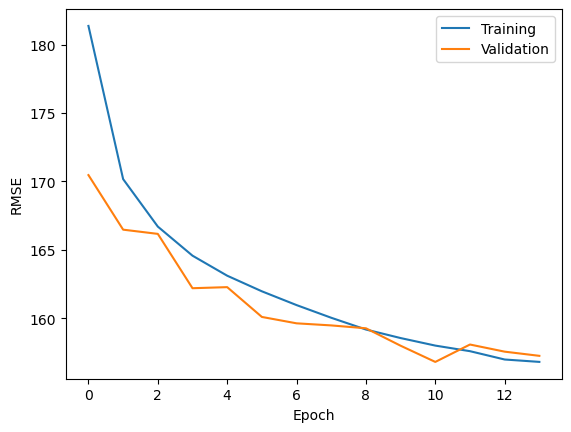

In [111]:
# Defining plots
plt.plot(history_12.history['root_mean_squared_error'], label='RMSE training')
plt.plot(history_12.history['val_root_mean_squared_error'], label='RMSE validation')
plt.ylabel('RMSE')
plt.xlabel('Epoch')

# Defining legend
legend_drawn_flag = True
plt.legend(["Training", "Validation"], loc=0, frameon=legend_drawn_flag)

plt.show()

**6.7.7 Saving model**

In [124]:
# Saving model
model_12.save('./tf_model_12')

Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


Consider rewriting this model with the Functional API.


INFO:tensorflow:Assets written to: ./tf_model_12/assets


INFO:tensorflow:Assets written to: ./tf_model_12/assets
